In [1]:
import pickle
import numpy as np

In [9]:
import matplotlib
import matplotlib.pyplot as plt
# "the default sans-serif font is Arial"
matplotlib.rcParams['font.sans-serif'] = "Arial"
# Then, "ALWAYS use sans-serif fonts"
# matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 12})

In [3]:
# Save the LRC to pickle 
FLRC = open(r'Dtown_LRC7am.pickle', 'rb')
LRC = pickle.load(FLRC)
FLRC.close()

In [4]:
LRC_values = list(LRC.values())

In [5]:
max(LRC_values)

0.02689454161452067

In [6]:
LRC_normalized = (1/max(LRC_values)) * np.array(LRC_values)

In [10]:
Xc = [0.03, 0.03]
Yc = [0, 300]

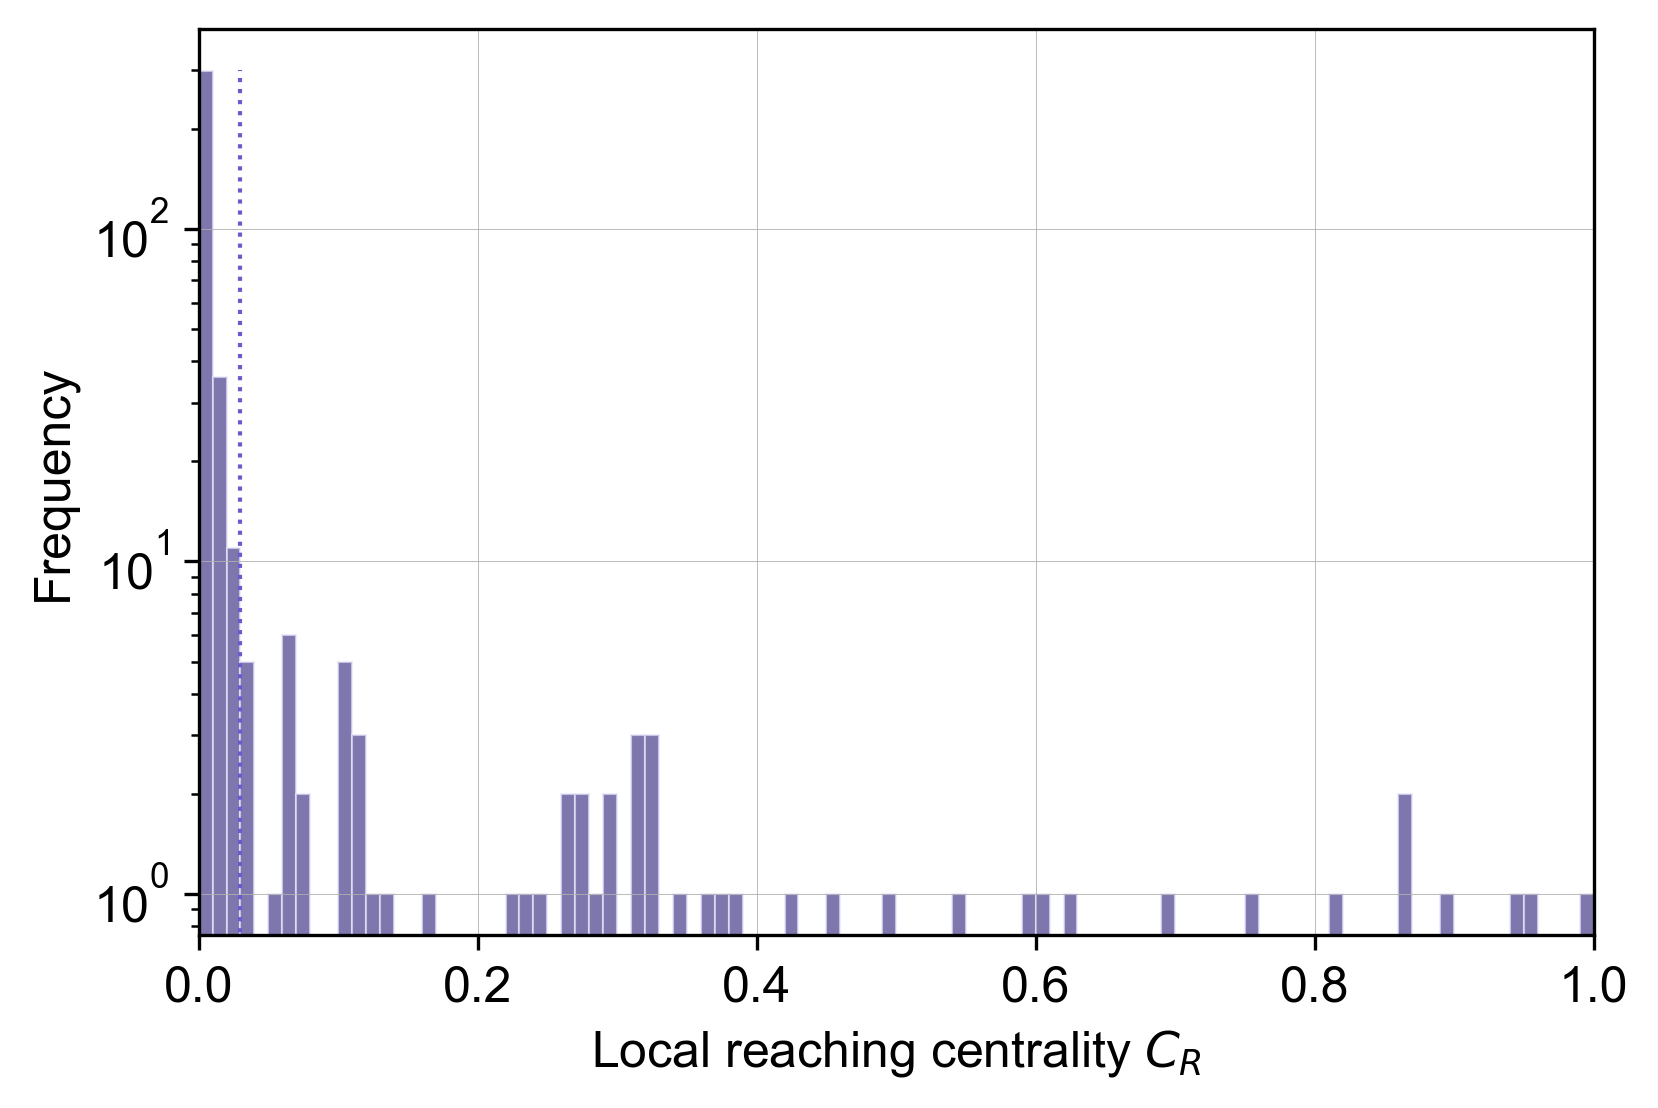

In [11]:
N, Bins, Patches = plt.hist(LRC_normalized, bins=100, facecolor='darkslateblue', edgecolor='lavender', linewidth=0.5, alpha=0.7)
plt.plot(Xc, Yc, linewidth = 1, linestyle = 'dotted', c = 'slateblue')
plt.grid(linewidth=0.2)
plt.xlabel('Local reaching centrality $C_R$')
plt.ylabel('Frequency')
plt.xlim(0, 1)
# plt.ylim(0, 2000)
plt.yscale('log')
plt.rcParams['figure.figsize'] = (6, 4) 
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300
plt.savefig(r"Dtown_LRC.jpg" , bbox_inches='tight')
plt.show()

In [43]:
# Get the nodes that within 20th percentile and 100th percentile
#Threshold_LRC = np.percentile(LRC_values, 20)

In [12]:
def get_nodes_upper(threshold_lrc, lrc, normalized_factor):
    nodes_upper = []
    for key, value in lrc.items():
        if (normalized_factor*value) > threshold_lrc:
            nodes_upper.append(key)
    return nodes_upper 

In [22]:
Normalized_factor = (1/max(LRC_values))
Threshold_LRC = 0.03

In [20]:
Nodes_upper = get_nodes_upper(Threshold_LRC, LRC, Normalized_factor)

In [23]:
# Store the nodes
FNodes_upper = open(r'Dotwon_Nodes_upper_new.pickle', 'wb')
pickle.dump(Nodes_upper, FNodes_upper)
FNodes_upper.close()